In [45]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
counties = gpd.read_file("tl_2024_us_county.zip")
nc_counties = counties[counties['STATEFP'] == '37']

In [47]:
nc_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
23,37,037,01008544,37037,0500000US37037,Chatham,Chatham County,06,H1,G4020,450,20500,None,A,1765030860,70580568,+35.7049939,-079.2514542,"POLYGON ((-79.241 35.571, -79.241 35.571, -79...."
59,37,001,01008531,37001,0500000US37001,Alamance,Alamance County,06,H1,G4020,268,15500,None,A,1096763237,27913357,+36.0439535,-079.4005733,"POLYGON ((-79.268 35.909, -79.268 35.909, -79...."
90,37,057,01008548,37057,0500000US37057,Davidson,Davidson County,06,H1,G4020,268,49180,None,A,1432251776,37596316,+35.7951312,-080.2071070,"POLYGON ((-80.394 35.973, -80.394 35.973, -80...."
181,37,069,01008553,37069,0500000US37069,Franklin,Franklin County,06,H1,G4020,450,39580,None,A,1273761678,7173998,+36.0882466,-078.2830821,"POLYGON ((-78.13 36.24, -78.13 36.239, -78.13 ..."
218,37,155,01026130,37155,0500000US37155,Robeson,Robeson County,06,H1,G4020,246,31300,None,A,2453480732,5076395,+34.6392096,-079.1008811,"POLYGON ((-79.128 34.883, -79.128 34.883, -79...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,37,175,01008589,37175,0500000US37175,Transylvania,Transylvania County,06,H1,G4020,120,14820,None,A,979943598,5091023,+35.2101025,-082.8166660,"POLYGON ((-82.798 35.361, -82.798 35.362, -82...."
3114,37,171,01008587,37171,0500000US37171,Surry,Surry County,06,H1,G4020,268,34340,None,A,1379541809,10392704,+36.4154160,-080.6864631,"POLYGON ((-80.446 36.455, -80.446 36.448, -80...."
3156,37,043,01008546,37043,0500000US37043,Clay,Clay County,06,H1,G4020,None,None,None,A,556849483,15046554,+35.0529971,-083.7522638,"POLYGON ((-83.866 35.127, -83.865 35.128, -83...."
3165,37,055,01026133,37055,0500000US37055,Dare,Dare County,06,H1,G4020,545,28620,None,A,992558552,3000513281,+35.6062688,-075.7675364,"POLYGON ((-75.813 36.224, -75.793 36.228, -75...."


<Axes: >

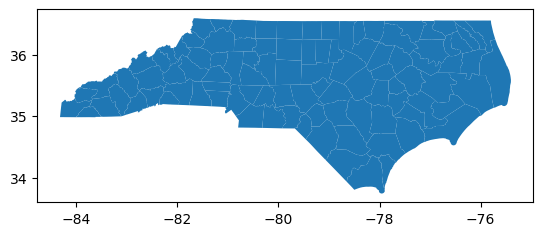

In [48]:
nc_counties.plot()

In [100]:
demographics = pd.read_csv("Demographics.csv")
demographics.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0090PM,DP05_0091PE,DP05_0091PM,DP05_0092PE,DP05_0092PM,DP05_0093PE,DP05_0093PM,DP05_0094PE,DP05_0094PM,Unnamed: 378
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0500000US37001,"Alamance County, North Carolina",174286,*****,83490,91,90796,91,92.0,0.2,...,0.5,(X),(X),126291,(X),46.6,0.2,53.4,0.2,NaN
2,0500000US37003,"Alexander County, North Carolina",36440,*****,18750,198,17690,198,106.0,2.3,...,1.0,(X),(X),28989,(X),51.8,0.5,48.2,0.5,NaN
3,0500000US37005,"Alleghany County, North Carolina",11075,*****,5471,146,5604,146,97.6,5.2,...,1.0,(X),(X),8893,(X),47.9,1.4,52.1,1.4,NaN
4,0500000US37007,"Anson County, North Carolina",21903,*****,10953,159,10950,159,100.0,2.9,...,1.2,(X),(X),17046,(X),50.0,0.4,50.0,0.4,NaN


In [101]:
demographics = demographics.drop(columns = "GEO_ID")
demographics['NAME'] = demographics['NAME'].apply(lambda x : x.split(",")[0])

In [102]:
demographics.set_index("Geographic Area Name")

KeyError: "None of ['Geographic Area Name'] are in the columns"

In [99]:
demographics = demographics.rename(columns = demographics.iloc[0])
demographics.iloc[1:,:]

TypeError: unhashable type: 'Series'

In [103]:
demographics

,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,...,DP05_0090PM,DP05_0091PE,DP05_0091PM,DP05_0092PE,DP05_0092PM,DP05_0093PE,DP05_0093PM,DP05_0094PE,DP05_0094PM,Unnamed: 378
0,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Under...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,Alamance County,174286,*****,83490,91,90796,91,92.0,0.2,9957,...,0.5,(X),(X),126291,(X),46.6,0.2,53.4,0.2,NaN
2,Alexander County,36440,*****,18750,198,17690,198,106.0,2.3,1781,...,1.0,(X),(X),28989,(X),51.8,0.5,48.2,0.5,NaN
3,Alleghany County,11075,*****,5471,146,5604,146,97.6,5.2,465,...,1.0,(X),(X),8893,(X),47.9,1.4,52.1,1.4,NaN
4,Anson County,21903,*****,10953,159,10950,159,100.0,2.9,1145,...,1.2,(X),(X),17046,(X),50.0,0.4,50.0,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Wayne County,117606,*****,58449,132,59157,132,98.8,0.4,7523,...,0.5,(X),(X),84789,(X),49.1,0.3,50.9,0.3,NaN
97,Wilkes County,65983,*****,32769,188,33214,188,98.7,1.1,3270,...,0.5,(X),(X),51226,(X),48.8,0.3,51.2,0.3,NaN
98,Wilson County,78648,*****,37533,128,41115,128,91.3,0.6,4639,...,0.5,(X),(X),57807,(X),46.7,0.3,53.3,0.3,NaN
99,Yadkin County,37419,*****,18696,131,18723,131,99.9,1.4,1857,...,0.4,(X),(X),28274,(X),49.2,0.3,50.8,0.3,NaN
